# Status of Covid 19 Cases in Ontario


#### This is just keeping track of the Covid 19 numbers in Ontario, and generating some plots since I couldn't find plots specifically for Ontario anywhere.


Data updated daily from here: https://www.ontario.ca/page/how-ontario-is-responding-covid-19


No modelling or anything is being done (although I might in the future). Feel free to use the data yourself.

In [43]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the data

In [44]:
# read the data annd transpose it to have the descriptors as column headers 
data = np.genfromtxt('Ontario Covid19 data.csv', delimiter=',', encoding="utf-8-sig", dtype=None).T


# create pandas dataframe
data = pd.DataFrame(data[1:, :], columns=data[0])

# convert "Date" column to datetime objects
data["Date"] = data["Date"].apply(lambda date : datetime.strptime(date, "%m/%d/%Y"))

# store data for use in other notebooks
%store data

Stored 'data' (DataFrame)


In [45]:
data

,Date,Number of cases,Change from previous report,Resolved,Deceased,Male,Female,19 and under,20-39,40-59,60-79,80 and over,Total Tested,Currently Under Investigation,Number of patients hospitalized with COVID-19,Number of patients in ICU with COVID-19,Number of patients in ICU on a ventilator with COVID-19
0,2020-06-16,32744,190,27784,2550,14796,17677,1441,9196,10031,6334,5729,1071429,21635,383,92,65
1,2020-06-15,32554,184,27431,2538,14710,17582,1422,9115,9974,6312,5718,1047224,17920,413,98,70
2,2020-06-14,32370,181,27213,2527,14617,17491,1402,9032,9916,6294,5713,1025500,18258,419,104,69
3,2020-06-13,32189,197,26961,2519,14532,17397,1375,8973,9862,6262,5703,1003749,25290,438,103,77
4,2020-06-12,31992,266,26538,2507,14416,17317,1352,8893,9799,6235,5699,980471,26158,489,110,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2020-03-21,311,,5,2,,,,,,,,19511,5475,,,
88,2020-03-20,251,,5,2,,,,,,,,16650,3971,,,
89,2020-03-19,208,,5,1,,,,,,,,13897,3378,,,
90,2020-03-18,183,,5,1,,,,,,,,11171,1567,,,


# Cases in Ontario

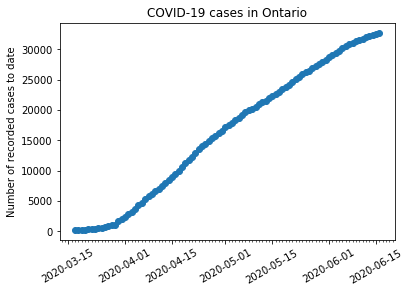

In [46]:
date = data["Date"].tolist()
cases = data["Number of cases"].astype(float).tolist()

fig, ax = plt.subplots()
plt.plot_date(date, cases)

days = mdates.DayLocator()  # every day
ax.xaxis.set_minor_locator(days)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
#plt.yscale("log")
plt.title("COVID-19 cases in Ontario")
plt.ylabel("Number of recorded cases to date")
plt.show()

Stored 'daily_cases' (ndarray)


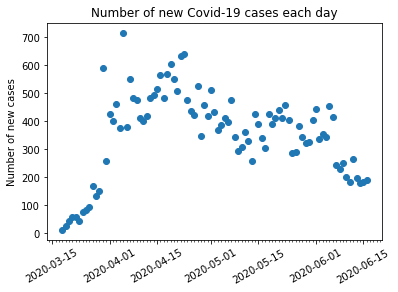

In [47]:
daily_cases = np.zeros(len(cases)-1)
for i in range(len(cases)-1):
    daily_cases[i] = cases[i] - cases[i+1]

%store daily_cases

fig, ax = plt.subplots()
plt.plot_date(date[:-1], daily_cases)
ax.xaxis.set_minor_locator(days)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
#plt.yscale("log")
plt.title("Number of new Covid-19 cases each day")
plt.ylabel("Number of new cases")
plt.show()

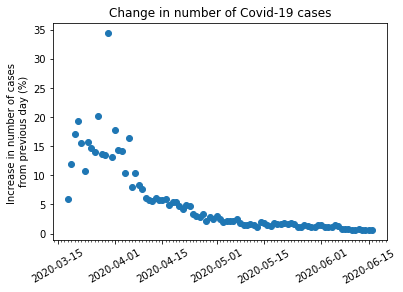

In [48]:
case_change = np.zeros(len(cases)-1)
for i in range(len(cases)-1):
    case_change[i] = 100*(cases[i] - cases[i+1])/cases[i]


fig, ax = plt.subplots()
plt.plot_date(date[:-1], case_change)
ax.xaxis.set_minor_locator(days)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
#plt.yscale("log")
plt.title("Change in number of Covid-19 cases")
plt.ylabel("Increase in number of cases \nfrom previous day (%)")
plt.show()

# Deaths in Ontario

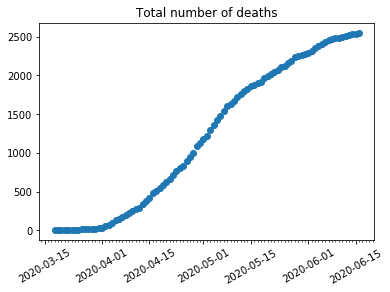

In [49]:
date = data["Date"].tolist()[:-1]
deaths = data["Deceased"][:-1].astype(float).tolist()
fig, ax = plt.subplots()
plt.plot_date(date, deaths)
ax.xaxis.set_minor_locator(days)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
#plt.yscale("log")
plt.title("Total number of deaths")
plt.show()

Stored 'daily_deaths' (ndarray)


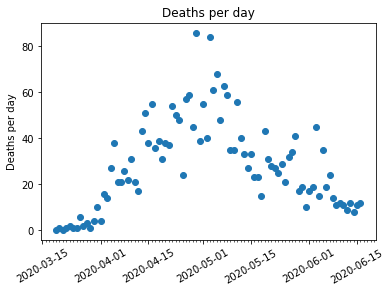

In [50]:
daily_deaths = np.zeros(len(deaths)-1)
for i in range(len(deaths)-1):
    daily_deaths[i] = deaths[i] - deaths[i+1]

%store daily_deaths
    
fig, ax = plt.subplots()
plt.plot_date(date[:-1], daily_deaths[:])
ax.xaxis.set_minor_locator(days)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
plt.title("Deaths per day")
plt.ylabel("Deaths per day")
plt.show()

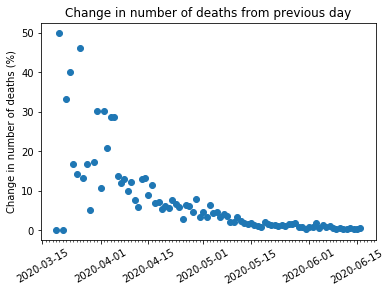

In [51]:
death_change = np.zeros(len(deaths)-1)
for i in range(len(deaths)-1):
    death_change[i] = 100*(deaths[i] - deaths[i+1])/deaths[i]

fig, ax = plt.subplots()
plt.plot_date(date[:-1], death_change[:])
ax.xaxis.set_minor_locator(days)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
plt.title("Change in number of deaths from previous day")
plt.ylabel("Change in number of deaths (%)")
plt.show()

# Daily Changes

Stored 'daily_recoveries' (ndarray)


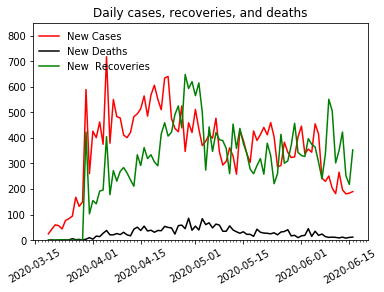

In [52]:
date = data["Date"].tolist()
recoveries = data["Resolved"].astype(float).tolist()

daily_recoveries = np.zeros(len(cases)-1)
for i in range(len(cases)-1):
    daily_recoveries[i] = recoveries[i] - recoveries[i+1]

%store daily_recoveries
    
fig, ax = plt.subplots()
plt.plot_date(date[:-2], daily_cases[:-1], "r", label="New Cases")
plt.plot_date(date[:-2], daily_deaths, "k", label="New Deaths")
plt.plot_date(date[:-2], daily_recoveries[:-1], "g", label="New  Recoveries")
ax.xaxis.set_minor_locator(days)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
#plt.yscale("log")
plt.title("Daily cases, recoveries, and deaths")
plt.legend(loc="upper left", framealpha=0, bbox_to_anchor=(-0.01,1))
plt.ylim([0,850])
plt.show()

# Active cases

In [53]:
# create dataframe with required information (convert from int to string, and remove the row with no death information)
last_index = len(data["Date"]) - 1
data2 = data[["Number of cases", "Resolved", "Deceased"]].copy().drop([last_index]).astype(int)

# add date information
data2["Date"] = data["Date"].drop([last_index])

# Create column of active cases (total - deaths - resolved)
data2["Active cases"] = data2["Number of cases"] - data2["Resolved"] - data2["Deceased"]

# rearanging columns
data2 = data2[["Date", "Number of cases", "Resolved", "Deceased", "Active cases"]]


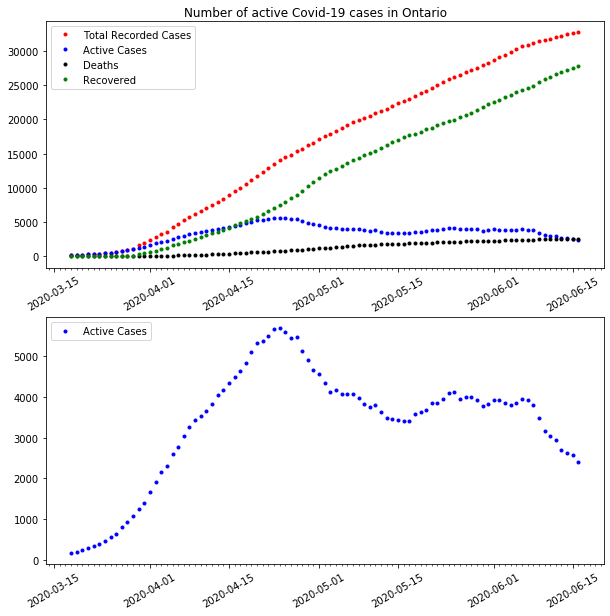

In [54]:
date2 = data2["Date"].tolist()
active = data2["Active cases"].tolist()
cases2 = data2["Number of cases"].tolist()
deaths = data2["Deceased"].tolist()
resolved = data2["Resolved"].tolist()

# plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
ax1.plot_date(date2, cases2, 'r.', label="Total Recorded Cases")
ax1.plot_date(date2, active, 'b.', label='Active Cases')
ax1.plot_date(date2, deaths, 'k.', label="Deaths")
ax1.plot_date(date2, resolved, 'g.', label="Recovered")

ax1.xaxis.set_minor_locator(days)
ax1.xaxis.set_tick_params(rotation=30, labelsize=10)

ax2.plot_date(date2, active, 'b.', label='Active Cases')
ax2.xaxis.set_minor_locator(days)
ax2.xaxis.set_tick_params(rotation=30, labelsize=10)
#plt.yscale("log")
plt.suptitle("Number of active Covid-19 cases in Ontario", y=0.9)
ax1.legend(loc="upper left")
ax2.legend(loc="upper left")
plt.show()

# Testing

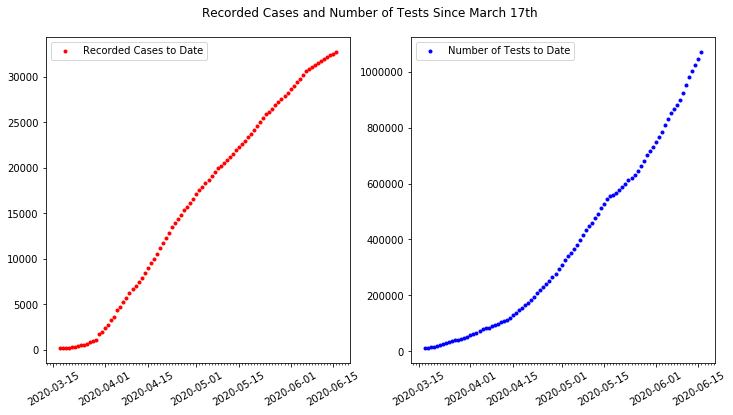

In [55]:
all_dates = data["Date"].tolist()
cases = data["Number of cases"].astype(float).tolist()
tests = data["Total Tested"].astype(float).tolist()


# plotting
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
ax1.plot_date(all_dates, cases, 'r.', label="Recorded Cases to Date")
ax1.legend(loc="upper left")
ax2.plot_date(all_dates, tests, 'b.', label='Number of Tests to Date')
ax2.legend(loc="upper left")
ax1.xaxis.set_minor_locator(days)
ax1.xaxis.set_tick_params(rotation=30, labelsize=10)
ax2.xaxis.set_minor_locator(days)
ax2.xaxis.set_tick_params(rotation=30, labelsize=10)
plt.suptitle("Recorded Cases and Number of Tests Since March 17th", y=0.95)
plt.show()


# Hospitalizations

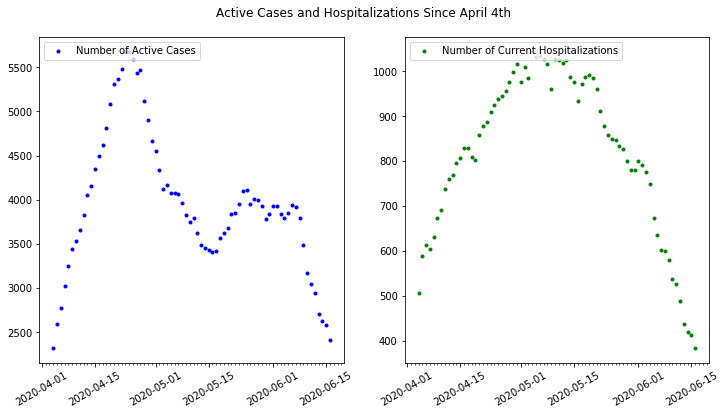

In [56]:
# index of day before hospitalization data was included (April 3rd)
first_day_index = data["Date"].tolist().index(datetime.strptime("04/03/2020", "%m/%d/%Y"))
hospitalizations = data["Number of patients hospitalized with COVID-19"][:first_day_index].astype(float).tolist()

# plotting
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
ax1.plot_date(all_dates[0:first_day_index], active[0:first_day_index], 'b.', label="Number of Active Cases")
ax1.legend(loc="upper left")
ax2.plot_date(all_dates[0:first_day_index], hospitalizations, 'g.', label="Number of Current Hospitalizations")
ax2.legend(loc="upper left")
ax1.xaxis.set_minor_locator(days)
ax1.xaxis.set_tick_params(rotation=30, labelsize=10)
ax2.xaxis.set_minor_locator(days)
ax2.xaxis.set_tick_params(rotation=30, labelsize=10)
plt.suptitle("Active Cases and Hospitalizations Since April 4th", y=0.95)
plt.show()
#

# Age Demographics

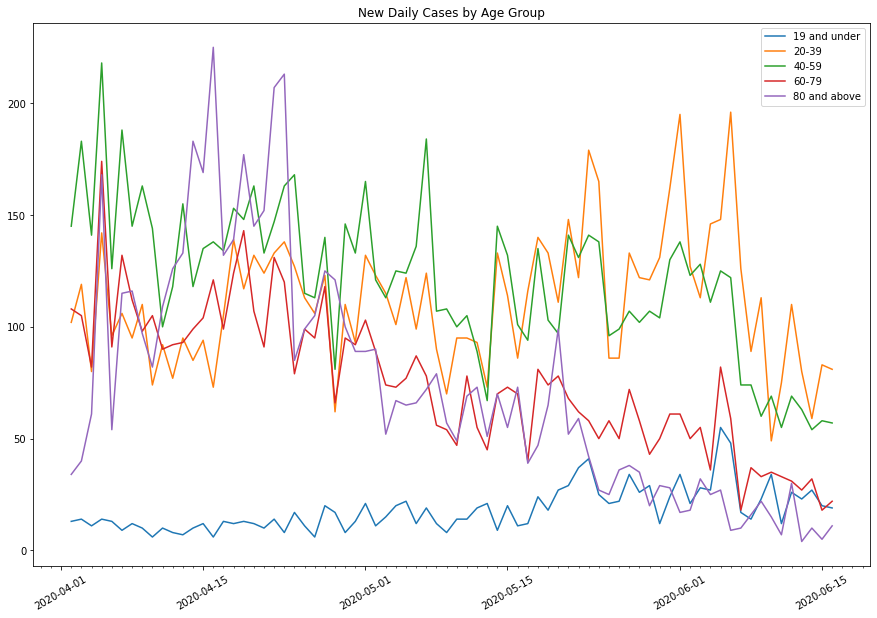

In [97]:
# first date with age data (April 1)
first_date = datetime.strptime("2020-04-01", "%Y-%m-%d")
last_index = date.index(first_date)  # dates are reverse chronological so this is the last index

# age demographics:
u19 = np.array(data["19 and under"].tolist()[:last_index+1]).astype(int)
u39 = np.array(data["20-39"].tolist()[:last_index+1]).astype(int)
u59 = np.array(data["40-59"].tolist()[:last_index+1]).astype(int)
u79 = np.array(data["60-79"].tolist()[:last_index+1]).astype(int)
over80 = np.array(data["80 and over"].tolist()[:last_index+1]).astype(int)


# daily cases by age
daily_u19 = np.zeros(len(u19)-1)
daily_u39 = np.zeros(len(u19)-1)
daily_u59 = np.zeros(len(u19)-1)
daily_u79 = np.zeros(len(u19)-1)
daily_over80 = np.zeros(len(u19)-1)
for i in range(len(u19)-1):
    daily_u19[i] = u19[i] - u19[i+1]
    daily_u39[i] = u39[i] - u39[i+1]
    daily_u59[i] = u59[i] - u59[i+1]
    daily_u79[i] = u79[i] - u79[i+1]
    daily_over80[i] = over80[i] - over80[i+1]

# plotting
fig, ax = plt.subplots(figsize=(15, 10))
plt.plot_date(date[:last_index], daily_u19, '-', label="19 and under")
plt.plot_date(date[:last_index], daily_u39, '-', label="20-39")
plt.plot_date(date[:last_index], daily_u59, '-', label="40-59")
plt.plot_date(date[:last_index], daily_u79, '-', label="60-79")
plt.plot_date(date[:last_index], daily_over80, '-', label="80 and above")

ax.xaxis.set_minor_locator(days)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
plt.title("New Daily Cases by Age Group")
plt.legend(loc="upper right")
plt.show()